# CORDIC algorithm in hyperbolic coordinates

## Classical method 

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def Arc_lib(iteration):
        return math.atanh(2**(-1*iteration))

In [2]:
def constant(iterations):
    A_list = []
    iterations_list = []
    A = 1
    for i in range(1, iterations+1):
        A *= math.sqrt(1 - 2**(-2*i))
        A_list.append(A)
        iterations_list.append(i)
    return {'constant value': A_list, 'iterations': iterations_list }  

Constant_n = 0.8297816201389014


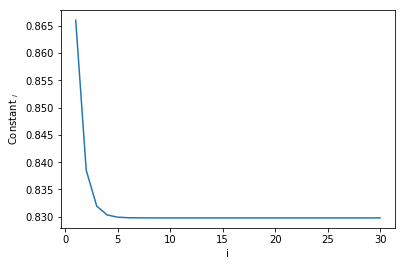

In [3]:
plt.plot(constant(30)['iterations'], constant(30)['constant value'])
plt.xlabel('i')
plt.ylabel('Constant $_{i}$')
print("Constant_n = " + str(constant(30)['constant value'][-1]))

In [4]:
def Hyperbolic_rotation_mode(x, y, z, iterations):
    x_list = []
    y_list = []
    z_list = []
    iterations_list = []
    i = 0;                 
    _x = x          
    _y = y         
    _z = z         
    di = 0
    i = 1
    temp = 0
    if (iterations > 0):
        while (i < iterations):
            if (_z < 0):
                di = -1
            else:
                di = +1
            new_z = _z - di * Arc_lib(i)
            new_x = _x + di * _y * (2**(-1*i))
            new_y = _y + di * _x * 2**(-1*i)
            
            _x = new_x
            _y = new_y
            _z = new_z

            x_list.append(_x)
            y_list.append(_y)
            z_list.append(_z)
            iterations_list.append(i)
            if ((i != 4) & (i != 13) & (i!=40)):
                i = i+1
            elif (temp == 0):
                temp = 1
            elif (temp == 1):
                temp = 0
                i = i+1
    return { 'x':x_list, 'y':y_list, 'z':z_list, 'iteration':iterations_list, }

In [5]:
result_dict_1 = Hyperbolic_rotation_mode(1.207497067763, 0, 0.3, 50)
result_dict_2 = Hyperbolic_rotation_mode(1.207497067763, 0, 0.15, 50)

Zn1 =-1.5319552961408094e-15
Zn2 =-1.3269346637921605e-15


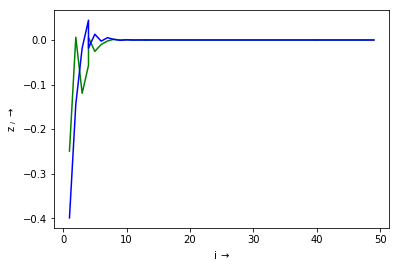

In [6]:
plt.plot(result_dict_1['iteration'], result_dict_1['z'], 'g', result_dict_2['iteration'], result_dict_2['z'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('z $_{i}$ $\\rightarrow$')
print("Zn1 =" + str(result_dict_1['z'][-1]))
print("Zn2 =" + str(result_dict_2['z'][-1]))

Xn1 = Cosh(0.3) = 1.0453385141287979
Xn2 = Cosh(0.15) = 1.011271109576611


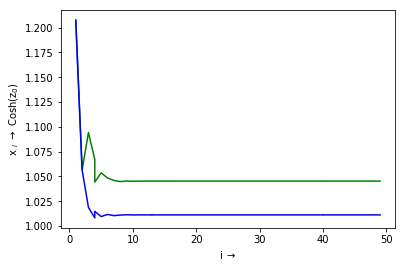

In [7]:
plt.plot(result_dict_1['iteration'], result_dict_1['x'], 'g', result_dict_2['iteration'], result_dict_2['x'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('x $_{i}$ $\\rightarrow$ Cosh(z$_{0}$)')
print("Xn1 = Cosh(0.3) = " + str(result_dict_1['x'][-1]))
print("Xn2 = Cosh(0.15) = " + str(result_dict_2['x'][-1]))

Yn1 = Sinh(0.3) = 0.30452029344712606
Yn2 = Sinh(0.15) = 0.150563133151605


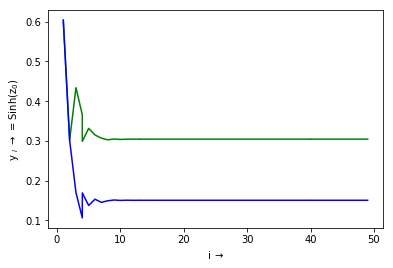

In [8]:
plt.plot(result_dict_1['iteration'], result_dict_1['y'], 'g', result_dict_2['iteration'], result_dict_2['y'], 'b')
plt.xlabel('i $\\rightarrow$')
plt.ylabel('y $_{i}$ $\\rightarrow$ = Sinh(z$_{0}$)')
print("Yn1 = Sinh(0.3) = " + str(result_dict_1['y'][-1]))
print("Yn2 = Sinh(0.15) = " + str(result_dict_2['y'][-1]))

## Computing error delta

In [9]:
Error_x1 = [np.abs(result_dict_1['x'][i] - math.cosh(0.3)) for i in range(len(result_dict_1['x']))]
Error_y1 = [np.abs(result_dict_1['y'][i] - math.sinh(0.3)) for i in range(len(result_dict_1['y']))]
Error_x2 = [np.abs(result_dict_2['x'][i] - math.cosh(0.15)) for i in range(len(result_dict_2['x']))]
Error_y2 = [np.abs(result_dict_2['y'][i] - math.sinh(0.15)) for i in range(len(result_dict_2['y']))]

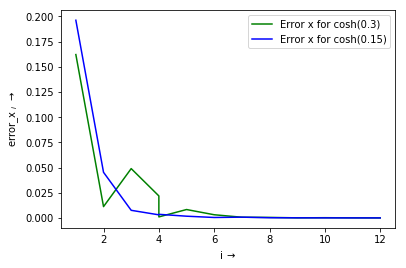

In [10]:
plt.plot(result_dict_1['iteration'][0:13], Error_x1[0:13], 'g', label = 'Error x for cosh(0.3)') 
plt.plot(result_dict_2['iteration'][0:13], Error_x2[0:13], 'b', label = "Error x for cosh(0.15)")
plt.xlabel('i $\\rightarrow$')
plt.ylabel('error_x $_{i}$ $\\rightarrow$')
plt.legend()

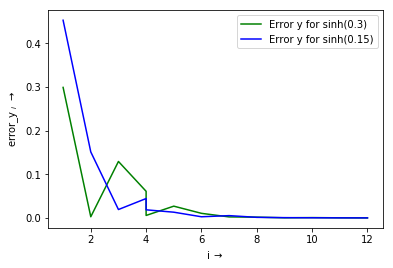

In [11]:
plt.plot(result_dict_1['iteration'][0:13], Error_y1[0:13], 'g', label = 'Error y for sinh(0.3)') 
plt.plot(result_dict_2['iteration'][0:13], Error_y2[0:13], 'b', label = "Error y for sinh(0.15)")
plt.xlabel('i $\\rightarrow$')
plt.ylabel('error_y $_{i}$ $\\rightarrow$')
plt.legend()

## Modified method 

In [12]:
def Hyperbolic_rotation_mode_modified(x, y, z, iter_pos, iter_neg):
    
    def Arc_lib(iteration, mode):
        if mode == 1:
#             return np.arctanh (2**(-1 * iteration))
            return math.atanh (2**(-1 * iteration))
        if mode == -1:
#             return np.arctanh (1 - 2**(iteration - 2))
            return math.atanh (1 - 2**(iteration - 2))
        
    x_list = []
    y_list = []
    z_list = []
    iterations_list = []
    convergence_x_list = []
    
    convergence_rate_x_1 = 1
    convergence_rate_x_2 = abs (x)
    _x = x    
    _y = y     
    _z = z      
    di = 0
    temp = 0
    k = iter_neg
    while (k < 1):
        if (_z < 0):
            di = -1
        else:
            di = +1
        new_z = _z - di * Arc_lib(k, -1)
        new_x = _x + di * _y * (1 - 2**(k-2))
        new_y = _y + di * _x * (1 - 2**(k-2))
        
        convergence_rate_x_1 = convergence_rate_x_2
        convergence_rate_x_2 = abs (new_x - _x)
        _x = new_x
        _y = new_y
        _z = new_z

        x_list.append(_x)
        y_list.append(_y)
        z_list.append(_z)
        iterations_list.append(k)
        if (abs (convergence_rate_x_1) < 1.e-10):
            convergence_x_list.append(np.nan)
        else:
            convergence_x_list.append(convergence_rate_x_2 / convergence_rate_x_1)
        k += 1
    while (k < iter_pos):
        if (_z < 0):
            di = -1
        else:
            di = +1
        new_z = _z - di * Arc_lib(k, 1)
        new_x = _x + di * _y * 2**(-1*k)
        new_y = _y + di * _x * 2**(-1*k)
                   
        convergence_rate_x_1 = convergence_rate_x_2
        convergence_rate_x_2 = abs (new_x - _x)
        _x = new_x
        _y = new_y
        _z = new_z

        x_list.append(_x)
        y_list.append(_y)
        z_list.append(_z)
        iterations_list.append(k)
        if (abs (convergence_rate_x_1) < 1.e-10):
            convergence_x_list.append(np.nan)
        else:
            convergence_x_list.append(convergence_rate_x_2 / convergence_rate_x_1)
        k += 1
    return { 'x':x_list, 'y':y_list, 'z':z_list, 'iteration':iterations_list, 'conv' : convergence_x_list }

In [13]:
def A_func (iter_neg, iter_pos):
    res = 1.
    for i in range (iter_neg, 1):
        res *= math.sqrt (1 - (1 - 2 ** (i - 2)) ** 2)
    for i in range (1, iter_pos + 1):
        res *= math.sqrt (1 - 2 ** (-2*i))
    return res

#compute exp(z)
N = 100
M = -10
x_in = 1. / A_func (M, N)
y_in = x_in
z = 30.

#проверка сходимости со значением из нумпая
A = Hyperbolic_rotation_mode_modified(x_in, y_in, z, N, M)
print(A['x'][-5:-1])
print (np.exp(z)) 
print (A['conv'][-5:-1])

[10686474581524.484, 10686474581524.484, 10686474581524.484, 10686474581524.484]
10686474581524.463
[nan, nan, nan, nan]


Xn1 = Exp(30) = 10686474581524.484


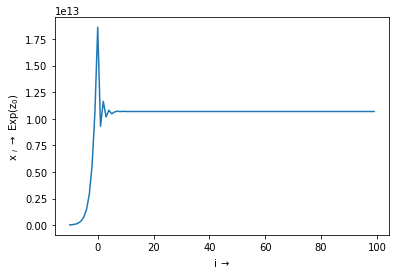

In [14]:
#теперь строим экспоненту. Здесь x = y = Exp(z)
plt.plot(A['iteration'], A['x'])
plt.xlabel('i $\\rightarrow$')
plt.ylabel('x $_{i}$ $\\rightarrow$ Exp(z$_{0}$)')
print("Xn1 = Exp(30) = " + str(A['x'][-1]))

Text(0, 0.5, 'Convergence of x $_{i}$ $\\rightarrow$ Exp(z$_{0}$)')

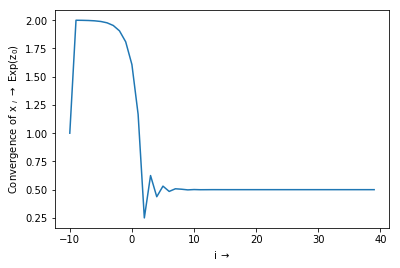

In [15]:
#Строим сходимость алгоритма
plt.plot(A['iteration'][0:50], A['conv'][0:50])
plt.xlabel('i $\\rightarrow$')
plt.ylabel('Convergence of x $_{i}$ $\\rightarrow$ Exp(z$_{0}$)')